<a href="https://colab.research.google.com/github/RoyDibs/RoyDibs.github.io/blob/master/SVM_classification_gp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip cementitiousDebris.zip
!unzip rebars.zip

Archive:  cementitiousDebris.zip
   creating: cementitiousDebris/
  inflating: cementitiousDebris/1.png  
  inflating: cementitiousDebris/10.png  
  inflating: cementitiousDebris/100.png  
  inflating: cementitiousDebris/101.png  
  inflating: cementitiousDebris/103.png  
  inflating: cementitiousDebris/104.png  
  inflating: cementitiousDebris/105.png  
  inflating: cementitiousDebris/106.png  
  inflating: cementitiousDebris/107.png  
  inflating: cementitiousDebris/108.png  
  inflating: cementitiousDebris/109.png  
  inflating: cementitiousDebris/11.png  
  inflating: cementitiousDebris/110.png  
  inflating: cementitiousDebris/111.png  
  inflating: cementitiousDebris/112.png  
  inflating: cementitiousDebris/113.png  
  inflating: cementitiousDebris/114.png  
  inflating: cementitiousDebris/115.png  
  inflating: cementitiousDebris/116.png  
  inflating: cementitiousDebris/117.png  
  inflating: cementitiousDebris/118.png  
  inflating: cementitiousDebris/119.png  
  inflating: c

In [2]:
#data preprocessing for training set
#rebars
from PIL import Image
import numpy as np
binimg=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,125):
    try:
        im = Image.open(f'/content/rebars/{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [3]:
len(binimg)

98

In [4]:
#data normalization
binimg=np.array(binimg)
binimg_scaled=[]
for img in binimg:
    img=img/255.0
    binimg_scaled.append(img)
binimg_scaled=np.array(binimg_scaled)

(98, 200, 200)


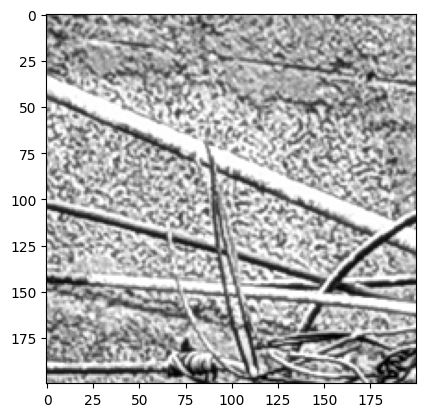

In [5]:
import matplotlib.pyplot as plt
i=np.random.randint(0,99)
plt.imshow(binimg_scaled[i],cmap='gray')
print(binimg_scaled.shape)

In [6]:
#training set formation
import numpy as np
Y=np.ones(binimg_scaled.shape[0])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(binimg_scaled,Y,train_size=0.75)
X_train=X_train.reshape(X_train.shape[0],(X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))
print(X_train.shape)
print(Y_train.shape)

(73, 40000)
(73,)


In [7]:
#data preprocessing for training set
#debris
from PIL import Image
import numpy as np
binimg1=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,238):
    try:
        im = Image.open(f'/content/cementitiousDebris/{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg1.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [8]:
#data normalization
binimg1=np.array(binimg1)
binimg_scaled1=[]
for img in binimg1:
    img=img/255.0
    binimg_scaled1.append(img)
binimg_scaled1=np.array(binimg_scaled1)

In [9]:
#training set formation
import numpy as np
Y1=np.zeros(binimg_scaled1.shape[0])
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(binimg_scaled1,Y1,train_size=0.7)
X_train1=X_train1.reshape(X_train1.shape[0],(X_train1.shape[1]*X_train1.shape[2]))
X_test1=X_test1.reshape(X_test1.shape[0],(X_test1.shape[1]*X_test1.shape[2]))
print(X_train1.shape)
print(Y_train1.shape)

(163, 40000)
(163,)


In [10]:
#data concatination and shuffling
X_train_f=np.concatenate((X_train,X_train1))
Y_train_f=np.concatenate((Y_train,Y_train1))
X_test_f=np.concatenate((X_test,X_test1))
Y_test_f=np.concatenate((Y_test,Y_test1))
from sklearn.utils import shuffle
X_train_f,Y_train_f=shuffle(X_train_f,Y_train_f,random_state=0)
X_test_f,Y_test_f=shuffle(X_test_f,Y_test_f,random_state=0)

In [11]:
#model tools
from sklearn.svm import SVC

In [12]:
model=SVC(C=10,kernel='rbf')
model.fit(X_train_f,Y_train_f)

SVC(C=10)

In [13]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='scale'),{'C':[0.1,1,10],'kernel':['rbf','linear','sigmoid','poly']},cv=5,return_train_score=True)
clf.fit(X_train_f,Y_train_f)
df=pd.DataFrame(clf.cv_results_)

In [14]:
df[['param_C','param_kernel','mean_test_score','mean_train_score']]

,param_C,param_kernel,mean_test_score,mean_train_score
0,0.1,rbf,0.690691,0.690679
1,0.1,linear,0.724734,1.000000
2,0.1,sigmoid,0.690691,0.690679
3,0.1,poly,0.724645,1.000000
4,1,rbf,0.758245,0.944929
5,1,linear,0.724734,1.000000
6,1,sigmoid,0.690691,0.690679
7,1,poly,0.703546,1.000000
8,10,rbf,0.788298,1.000000
9,10,linear,0.724734,1.000000


In [15]:
#prediction
y_predicted=model.predict(X_test_f)
print(f"accuracy of model is: {model.score(X_test_f,Y_test_f)}")

accuracy of model is: 0.8541666666666666


In [16]:
#comparison with original data
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])

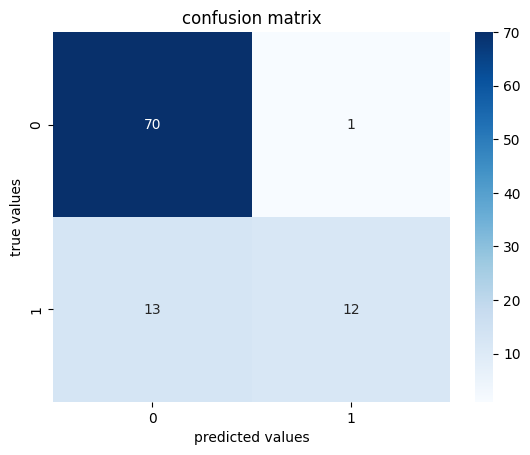

In [20]:
#visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [21]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(X_train_f,Y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
y_predicted=model2.predict(X_test_f)
print(f"accuracy of model is: {model2.score(X_test_f,Y_test_f)}")

accuracy of model is: 0.84375


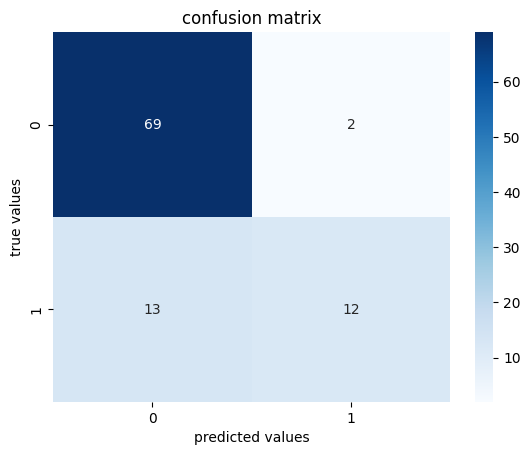

In [23]:
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");